In [3]:
import numpy as np
import matplotlib.pyplot as plt

Создаем  класс "Нейрон"

In [4]:
class Neuron:
    
    def __init__(self, x, labels, w): 
        self.x = x 
        self.labels = labels 
        self.w = w
    
    def summ(self, w, x): 
        res = w[0]        
        for i in range(1, len(w)): 
            res += w[i]*x[i-1]
        return res
    
    def sign(self, val):
        return -1 if val<=0 else 1
    
    def col(self, i):
        return 'blue' if self.labels[i] == 1 else 'red'
    
    def x1(self, x):
        return -1*(self.w[0] + self.w[1]*x)/self.w[2]
    
    def learn(self):
        N = 100
        alpha = 0.1 # Learning rate
        for i in range(N):
            mismatch = 0
            for j in range(len(self.x)):
                y = self.sign(self.summ(self.w, self.x[j]))
                if y * self.labels[j] < 0:
                    mismatch = 1
                    self.w[0] += alpha * self.labels[j]
                    for i in range(1, len(self.w)):
                        self.w[i] += alpha*self.labels[j]*self.x[j][i-1]
                    
            if mismatch == 0:
                print('Обучение закончилось на ', i, 'шагу.')
                x0 = []; x1 = []
                try:
                    for i in range(len(self.x)):
                        x0.append(self.x[i][0])
                        plt.scatter(self.x[i][0], self.x[i][1], color = self.col(i))
                    plt.plot(x0, [self.x1(x) for x in x0])
                    print('\n \n \t Синий - 1, Красный - 0')
                except IndexError:
                    print(self.w)
                break
                
    def output(self, x_input):
        return 1 if \
    self.sign(self.summ(self.w, x_input)) == 1 else 0

    
    

Нейрон "AND"

Обучение закончилось на  5 шагу.

 
 	 Синий - 1, Красный - 0


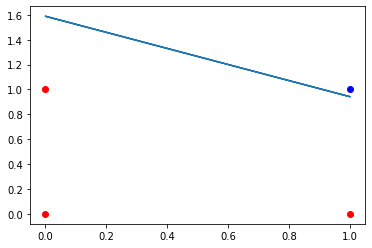

In [5]:
x_1 = np.array([[1, 1]]) # where label is 1
x_0 = np.array([[0, 0], [0, 1], [1, 0]]) # where label is 0

n_and = Neuron(np.concatenate((x_1, x_0)), np.concatenate((np.ones(x_1.shape[0]), -1*np.ones(x_0.shape[0]))), np.random.rand(3))
n_and.learn()

Нейрон "OR"

Обучение закончилось на  4 шагу.

 
 	 Синий - 1, Красный - 0


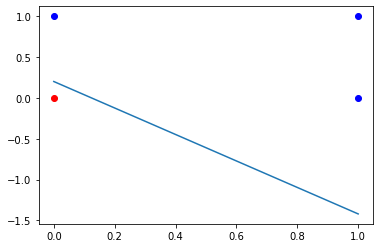

In [6]:
x_1 = np.array([[1, 1], [1, 0], [0, 1]]) # label 1
x_0 = np.array([[0, 0]]) # label 0
n_or = Neuron(np.concatenate((x_1, x_0)), np.concatenate((np.ones(x_1.shape[0]), -1*np.ones(x_0.shape[0]))), np.random.rand(3))
n_or.learn()

Для нейрона "XOR" добавим доп. функцию и так зазываемый "не" нейтрон

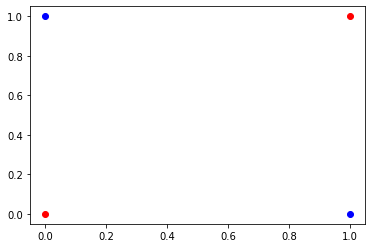

In [7]:
def col(i):
    return 'blue' if labels[i] == 1 else 'red'
x_1 = np.array([[1, 1], [1, 0], [0, 1]]) # label 1
x_0 = np.array([[0, 0]]) # label 0
x_1 = np.array([[1, 0], [0, 1]]) # label 1
x_0 = np.array([[0, 0], [1, 1]]) # label 0
x = np.concatenate((x_1, x_0))
labels = np.concatenate((np.ones(x_1.shape[0]), -1*np.ones(x_0.shape[0])))
for i in range(len(x)):
    plt.scatter(x[i][0], x[i][1], color = col(i))

In [8]:
x_not = np.array([[0], [1]])
labels_not = np.array([1, -1])

In [9]:
n_not = Neuron(x_not, labels_not, np.random.rand(2))

In [10]:
n_not.learn()

Обучение закончилось на  7 шагу.
[ 0.00643163 -0.08742178]


In [11]:
n_not.output([1])

0

In [12]:
def prepare_for_xor(x):
    x_xor = np.empty(x.shape)
    for i in range(len(x)):
        x_xor[i] = [n_and.output([n_not.output([x[i][0]]), x[i][1]]), \
                n_and.output([x[i][0], n_not.output([x[i][1]])])]
    return x_xor

In [13]:
x_xor = prepare_for_xor(x)

Обучение закончилось на  5 шагу.

 
 	 Синий - 1, Красный - 0


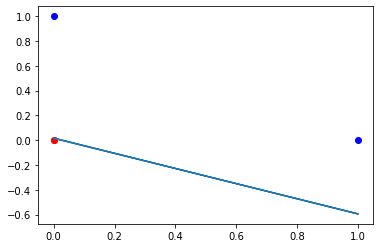

In [14]:
n_xor = Neuron(x_xor, labels, np.random.rand(3))
n_xor.learn()